In [32]:
from scipy.optimize import leastsq
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.table import Table
from astropy.time import Time

import etd

## A tiny bit of background

You will be fitting your measured magnitudes to a function that looks like this:

$$
m(t_i) = A - 2.5\log F(z, p, c_2) + B (t-t_{mean}) + C (t-t_{mean})^2.
$$

$A$, $B$, and $C$ remove atmospheric effects. The rest of the parameters you are fitting, $t_0$ (midpoint of transit), $D$ (duration of transit) and $p$, the radius of the planet are hidden in the function $F(z, p, c_2)$.

### In the cell below change the file name to match your data

In [2]:
exo_observations = Table.read('calibrated_magnitudes_kelt_16_faint_13.fits')

### Put in the right star id for your exoplanet -- we want only its data

In [3]:
exo_observations = exo_observations[exo_observations['star_id'] == 802]

In [4]:
exo_observations = exo_observations[:140]

### Change the column names below to match your data, if needed

Also remove the log if your data already has magnitudes

In [5]:
mags_measured = exo_observations['mag_cal']
# Or, if your data is already in magnitudes:
# mags_measured = exo_observations['my_cool_mags']
time = exo_observations['t_mid_tdb']

### No need to make changes here...

This is done to set the zero of the time to the midpoint of the data.

In [6]:
t_mean = time.mean()
t_adjusted = time - t_mean

# Set the values below to the values for *your* exoplanet

A good source of data is the NASA Exoplanet Archive: https://exoplanetarchive.ipac.caltech.edu/

Find your exoplanet in the catalog then click on the link in its detail listing to the original paper reporting the discovery, which *should* include everything you need.

## The data below is for Kelt -16b

In [7]:
p = 0.1070  # Scaled planet radius, i.e. R_planet/R_star
duration = 0.10370833  # Duration, in days, often listed as T_{14}
z_0 = 0.32  # impact parameter, also called b, can be calculated as a/R_star sin(i)

### No need to change the value below...

It is the initial guess for the time of the midpoint, which we take to be the mean of the data.

In [8]:
mid_point = 0
inp_params = [mags_measured.mean(), mid_point, duration, p, 0., 0.]

### Fitting happens here, you will get warnings

Just ignore them.

In [9]:
out_params, cov_x, infod, mesg, success = leastsq(etd.err_fit, inp_params[0:], full_output=True, args=(t_adjusted, mags_measured, z_0))

C:\Users\Adam Kline\Documents\2018-07-23-reduced\etd.py:43: RuntimeWarning: invalid value encountered in sqrt
  zp_minus = np.sqrt(1 - (z - p)**2)
C:\Users\Adam Kline\Documents\2018-07-23-reduced\etd.py:44: RuntimeWarning: invalid value encountered in sqrt
  zp_plus = np.sqrt(1 - (z + p)**2)
C:\Users\Adam Kline\Documents\2018-07-23-reduced\etd.py:60: RuntimeWarning: invalid value encountered in arccos
  flux = 1 - I_star/4/np.pi/omega*(p**2 * np.arccos((z-1)/p) -
C:\Users\Adam Kline\Documents\2018-07-23-reduced\etd.py:61: RuntimeWarning: invalid value encountered in sqrt
  (z-1) * np.sqrt(p**2 - (z-1)**2))


### The cell below finds errors in the fit values and prints fits and errors

In [10]:
s_sq = ((etd.err_fit(out_params, t_adjusted, mags_measured, z_0))**2).sum()/(len(mags_measured) - len(out_params))
pcov = cov_x * s_sq
perr = np.sqrt(np.diag(pcov))
perr
print('A: {0}\nB: {4}\nC: {5}\nt_0 (add to t_mean): {1}\nD (days): {2}\np: {3}'.format(*out_params))
print('EERORS')
print('A: {0}\nB: {4}\nC: {5}\nt_0 (add to t_mean): {1}\nD (days): {2}\np: {3}'.format(*perr))

A: 11.81852518492933
B: -0.014981920284997854
C: -1.1789083734667416
t_0 (add to t_mean): -0.0018172450220149225
D (days): 0.10395186753318769
p: 0.09703100267670695
EERORS
A: 0.0028025844482109305
B: 0.009375813745606481
C: 0.6769492895837755
t_0 (add to t_mean): 0.001210099403851471
D (days): 0.0032802873112742917
p: 0.010780773885717469


C:\Users\Adam Kline\Documents\2018-07-23-reduced\etd.py:43: RuntimeWarning: invalid value encountered in sqrt
  zp_minus = np.sqrt(1 - (z - p)**2)
C:\Users\Adam Kline\Documents\2018-07-23-reduced\etd.py:44: RuntimeWarning: invalid value encountered in sqrt
  zp_plus = np.sqrt(1 - (z + p)**2)
C:\Users\Adam Kline\Documents\2018-07-23-reduced\etd.py:60: RuntimeWarning: invalid value encountered in arccos
  flux = 1 - I_star/4/np.pi/omega*(p**2 * np.arccos((z-1)/p) -
C:\Users\Adam Kline\Documents\2018-07-23-reduced\etd.py:61: RuntimeWarning: invalid value encountered in sqrt
  (z-1) * np.sqrt(p**2 - (z-1)**2))


In [11]:
out_params

array([ 1.18185252e+01, -1.81724502e-03,  1.03951868e-01,  9.70310027e-02,
       -1.49819203e-02, -1.17890837e+00])

C:\Users\Adam Kline\Documents\2018-07-23-reduced\etd.py:43: RuntimeWarning: invalid value encountered in sqrt
  zp_minus = np.sqrt(1 - (z - p)**2)
C:\Users\Adam Kline\Documents\2018-07-23-reduced\etd.py:44: RuntimeWarning: invalid value encountered in sqrt
  zp_plus = np.sqrt(1 - (z + p)**2)
C:\Users\Adam Kline\Documents\2018-07-23-reduced\etd.py:60: RuntimeWarning: invalid value encountered in arccos
  flux = 1 - I_star/4/np.pi/omega*(p**2 * np.arccos((z-1)/p) -
C:\Users\Adam Kline\Documents\2018-07-23-reduced\etd.py:61: RuntimeWarning: invalid value encountered in sqrt
  (z-1) * np.sqrt(p**2 - (z-1)**2))


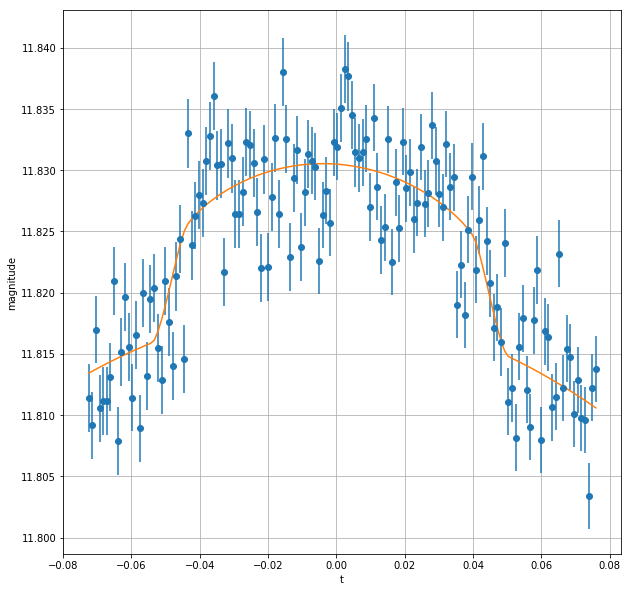

In [12]:
plt.figure(figsize=(10,10))
#plt.plot(t_adjusted, mags_measured, 'o')
plt.errorbar(t_adjusted - out_params[1], mags_measured, fmt='o', yerr=exo_observations['mag_error'])
plt.plot(t_adjusted - out_params[1], etd.mag_fit(out_params,  t_adjusted - out_params[1], z_0))
plt.xlabel('t')
plt.ylabel('magnitude')
plt.grid()

### Plot with atmospheric trends removed

C:\Users\Adam Kline\Documents\2018-07-23-reduced\etd.py:43: RuntimeWarning: invalid value encountered in sqrt
  zp_minus = np.sqrt(1 - (z - p)**2)
C:\Users\Adam Kline\Documents\2018-07-23-reduced\etd.py:44: RuntimeWarning: invalid value encountered in sqrt
  zp_plus = np.sqrt(1 - (z + p)**2)
C:\Users\Adam Kline\Documents\2018-07-23-reduced\etd.py:60: RuntimeWarning: invalid value encountered in arccos
  flux = 1 - I_star/4/np.pi/omega*(p**2 * np.arccos((z-1)/p) -
C:\Users\Adam Kline\Documents\2018-07-23-reduced\etd.py:61: RuntimeWarning: invalid value encountered in sqrt
  (z-1) * np.sqrt(p**2 - (z-1)**2))


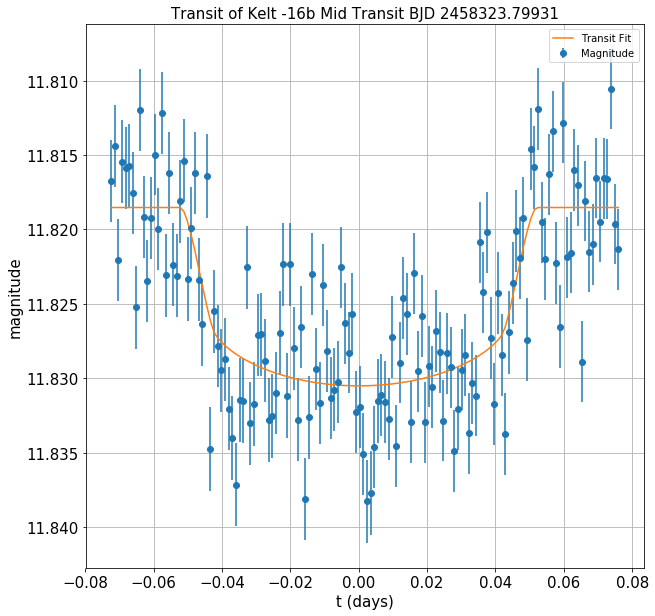

In [46]:
plt.figure(figsize=(10,10))

mag_adjust = out_params[0] + out_params[-2]*t_adjusted + out_params[-1]*t_adjusted**2
#plt.plot(t_adjusted - out_params[1], mags_measured - mag_adjust + out_params[0] , 'o')
plt.errorbar(t_adjusted - out_params[1], mags_measured - mag_adjust + out_params[0], fmt='o', yerr=exo_observations['mag_error'], label='Magnitude')

plt.plot(t_adjusted - out_params[1], etd.mag_fit(out_params, t_adjusted, z_0) - mag_adjust + out_params[0], label='Transit Fit')
plt.grid()
# Reverse the y axis
plt.ylim(reversed(plt.ylim()))
plt.xlabel('t (days)', fontsize=15)
plt.ylabel('magnitude', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(fontsize=10)
plt.title('Transit of Kelt -16b Mid Transit BJD 2458323.79931', fontsize=15)
plt.savefig('light_curve_kelt16b', bbox_inches='tight')


### Residuals

C:\Users\Adam Kline\Documents\2018-07-23-reduced\etd.py:43: RuntimeWarning: invalid value encountered in sqrt
  zp_minus = np.sqrt(1 - (z - p)**2)
C:\Users\Adam Kline\Documents\2018-07-23-reduced\etd.py:44: RuntimeWarning: invalid value encountered in sqrt
  zp_plus = np.sqrt(1 - (z + p)**2)
C:\Users\Adam Kline\Documents\2018-07-23-reduced\etd.py:60: RuntimeWarning: invalid value encountered in arccos
  flux = 1 - I_star/4/np.pi/omega*(p**2 * np.arccos((z-1)/p) -
C:\Users\Adam Kline\Documents\2018-07-23-reduced\etd.py:61: RuntimeWarning: invalid value encountered in sqrt
  (z-1) * np.sqrt(p**2 - (z-1)**2))


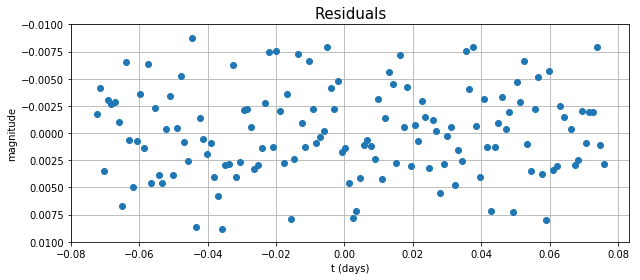

In [53]:
plt.figure(figsize=(10,4))
plt.plot(t_adjusted - out_params[1], mags_measured - etd.mag_fit(out_params, t_adjusted, z_0), 'o')
plt.xlabel('t (days)')
plt.ylabel('magnitude')
plt.grid()
plt.ylim(-.010, .010)
plt.ylim(reversed(plt.ylim()))
plt.title('Residuals', fontsize=15)
plt.savefig('lightCurveResiduals', bbox_inches='tight')

In [15]:
magMax = (etd.mag_fit(out_params, t_adjusted, z_0) - mag_adjust + out_params[0]).max()
magMin = (etd.mag_fit(out_params, t_adjusted, z_0) - mag_adjust + out_params[0]).min()

100 * (1 - 10**((magMax - magMin) / -2.5))

C:\Users\Adam Kline\Documents\2018-07-23-reduced\etd.py:43: RuntimeWarning: invalid value encountered in sqrt
  zp_minus = np.sqrt(1 - (z - p)**2)
C:\Users\Adam Kline\Documents\2018-07-23-reduced\etd.py:44: RuntimeWarning: invalid value encountered in sqrt
  zp_plus = np.sqrt(1 - (z + p)**2)
C:\Users\Adam Kline\Documents\2018-07-23-reduced\etd.py:60: RuntimeWarning: invalid value encountered in arccos
  flux = 1 - I_star/4/np.pi/omega*(p**2 * np.arccos((z-1)/p) -
C:\Users\Adam Kline\Documents\2018-07-23-reduced\etd.py:61: RuntimeWarning: invalid value encountered in sqrt
  (z-1) * np.sqrt(p**2 - (z-1)**2))


1.0971657709556215

In [16]:
p = 0.097031
dp = 0.01078077

error = 2 * (dp/p) * p**2
print(p**2, error)
magMax - magMin

0.009415014961000001 0.00209213778774


0.011978156942399565

### Lets Find out the JD of the transit...

In [50]:
timeJD = t_mean + out_params[1]
timeJD = Time(timeJD, scale='tdb', format='jd')
print(timeJD)

predictedTimeJD = Time('2018-07-24 07:13:00', scale='utc', format='iso')
print(predictedTimeJD.jd)

2458323.7993153753
2458323.800694444
